# SL&ML Exam 2023
### Name: Asger Song Høøck Poulsen
### Stud. No.: 202106630

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm
from scipy.stats import binom
from scipy.special import binom

import scipy
from sklearn.datasets import load_digits, make_swiss_roll
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns; sns.set(); sns.set_palette('bright')

# Topic 1

### 1)

For the least squeares problem we want to minimize the sum of squared errors (SSE). We can in this case write this as:
$$w = (\phi^T \phi)^{-1} \phi^T y$$


We have that
$$\phi(x) = \begin{bmatrix} 1 & x & x^2 \end{bmatrix} = \begin{bmatrix} 1 & x_1 & x_{1}^{2} \\ 1 & x_2 & x_{2}^{2} \\ 1 & x_3 & x_{3}^{2}\end{bmatrix}$$

Thus
$$w = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix}
= \left(\begin{bmatrix} 1 & 1 & 1 \\ x_1 & x_2 & x_3 \\ x_{1}^2 & x_{2}^2 & x_{3}^2 \end{bmatrix} \begin{bmatrix} 1 & x_1 & x_{1}^{2} \\ 1 & x_2 & x_{2}^{2} \\ 1 & x_3 & x_{3}^{2}\end{bmatrix}\right)^{-1} \begin{bmatrix} 1 & 1 & 1 \\ x_1 & x_2 & x_3 \\ x_{1}^2 & x_{2}^2 & x_{3}^2 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} $$

### 2)

In [2]:
data =  np.array([[0.5,0.4], [2.5,0.9],[4.5,0.25]])
print ("Data: \n", data, "\n")

# find phi (This is given in the exercise)
phi = np.array([[1,data[0,0], data[0,0]**2],
               [1,data[1,0], data[1,0]**2],
               [1,data[2,0], data[2,0]**2]])
print ("Phi: \n", phi, "\n")

# find y
y = np.array([[data[0,1]],
                [data[1,1]],
                [data[2,1]]])
print ("y: \n", y, "\n")

# find w
w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print ("w: \n", w, "\n")

Data: 
 [[0.5  0.4 ]
 [2.5  0.9 ]
 [4.5  0.25]] 

Phi: 
 [[ 1.    0.5   0.25]
 [ 1.    2.5   6.25]
 [ 1.    4.5  20.25]] 

y: 
 [[0.4 ]
 [0.9 ]
 [0.25]] 

w: 
 [[ 0.0953125]
 [ 0.68125  ]
 [-0.14375  ]] 



### 3)

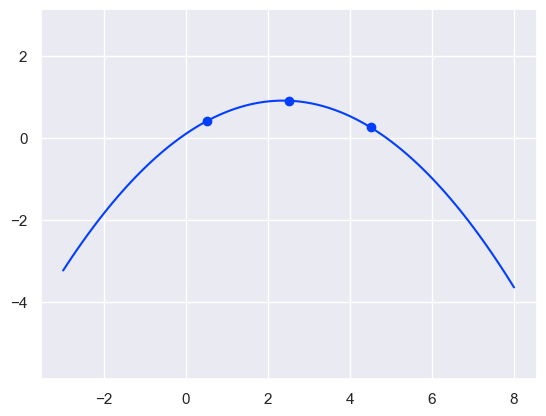

In [3]:
# plot the regression line
x = np.linspace(-3,8,100)
y = w[0] + w[1] * x + w[2] * x**2
plt.plot(x,y)
plt.scatter(data[:,0],data[:,1])
plt.axis('equal')
plt.show()

y_4:  [0.8828125]
y_5:  [0.71875] 

New data: 
 [[0.5       0.4      ]
 [2.5       0.9      ]
 [4.5       0.25     ]
 [2.        0.8828125]
 [3.5       0.71875  ]] 



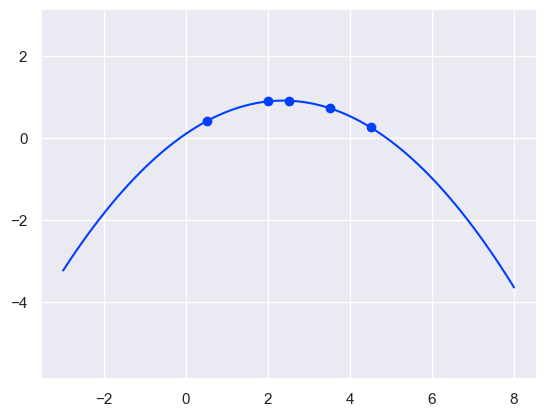

In [4]:
# find the new data points for t=0 and t=3
y_4 = w[0] + w[1] * 2 + w[2] * 2**2
y_5 = w[0] + w[1] * 3.5 + w[2] * 3.5**2
print ("y_4: ", y_4,)
print ("y_5: ", y_5, "\n")

#add the two new points to the data
data = np.vstack([data, [[2, y_4[0]], [3.5, y_5[0]]]])
print("New data: \n", data, "\n")
# plot the data
x = np.linspace(-3,8,100)
y = w[0] + w[1] * x + w[2] * x**2
plt.plot(x,y)
plt.scatter(data[:,0],data[:,1])
plt.axis('equal')
plt.show()

#### 4)

For a regression model to go through all $N$ target points we would need to use polynomial basis function of order $$M = N-1$$
Since we now have $5$ target points to train on but still use polynomial basis function of highest order $M = 2$ the model give a poor fit of the data.

To get a perfect fit on the data we would need polynomial basis functions of order
$$M = 5 - 1 = 4$$
i.e, the choice of basis functions would be
$$\phi(x) = \{\phi_0(x), \phi_1(x),\phi_2(x),\phi_3(x),\phi_4(x)\} = \{1, x, x^2, x^3, x^4\}$$

Note that as we get more and better training data the choice of basis functions could change, and that we would have to take into account of not over-fitting.

# Topic 2
Note that if $t = 0$ then the point belongs to class $C_1$ and if $t = 1$ then class $C_2$ for all the python outputs below.

### 1) K-nearest neighbour classification

In [5]:
# Insert data here
data = np.array([[2,3],[3,4],[4,2],[6,6],[7,5],[8,7]])
print ("Data: \n", data, "\n")

# Insert classes here
classes = np.array([0,0,0,1,1,1])
print ("Classes: \n", classes, "\n")

# Insert new data point here
new_data = np.array([[5,4],[6,4.5]])
print ("New data: \n", new_data, "\n")

Data: 
 [[2 3]
 [3 4]
 [4 2]
 [6 6]
 [7 5]
 [8 7]] 

Classes: 
 [0 0 0 1 1 1] 

New data: 
 [[5.  4. ]
 [6.  4.5]] 



In [6]:
# calculate the distance between each new data and each old data and assign the class of the closest old data to the new data
new_classes = np.zeros(len(new_data), dtype=object)
for i in range(len(new_data)):
    distances = np.zeros(len(data))
    for j in range(len(data)):
        distances[j] = np.linalg.norm(new_data[i]-data[j])
    new_classes[i] = classes[np.argmin(distances)]
        
print ("New classes: \n", new_classes, "\n")

New classes: 
 [0 1] 



### 2) Nearst centroid-based classification

In [7]:
# Find class centroids (means)
centroid_1 = np.mean(data[classes==0], axis=0)
centroid_2 = np.mean(data[classes==1], axis=0)
print ("Centroid 1: \n", centroid_1)
print ("Centroid 2: \n", centroid_2, "\n")

# Calculate distances to centroids for each new data point
distances = np.zeros((len(new_data), 2))
for i in range(len(new_data)):
    distances[i,0] = np.linalg.norm(new_data[i]-centroid_1)
    distances[i,1] = np.linalg.norm(new_data[i]-centroid_2)
print("The first column is the distance to centroid 1, and the second column is the distance to centroid 2.")
print ("Distances from centroids: \n", distances, "\n")

# Classify new data points
new_classes = np.zeros(len(new_data), dtype=object)
for i in range(len(new_data)):
    if distances[i,0] < distances[i,1]:
        new_classes[i] = 0
    elif distances[i,0] > distances[i,1]:
        new_classes[i] = 1
    else:
        new_classes[i] = "either"

print ("New classes: \n", new_classes, "\n")

Centroid 1: 
 [3. 3.]
Centroid 2: 
 [7. 6.] 

The first column is the distance to centroid 1, and the second column is the distance to centroid 2.
Distances from centroids: 
 [[2.23606798 2.82842712]
 [3.35410197 1.80277564]] 

New classes: 
 [0 1] 



### 3)

In [8]:
mu = (centroid_1 + centroid_2) / 2
print ("mu: \n", mu, "\n")

# Find the single-class scatter matrices
S1 = np.zeros((2,2))
S2 = np.zeros((2,2))

for i in range(len(data)):
    if classes[i] == 1:
        S1 += np.outer(data[i]-centroid_1, data[i]-centroid_1)
    elif classes[i] == 2:
        S2 += np.outer(data[i]-centroid_2, data[i]-centroid_2)
print ("single-class scatter matrices: \n", "Sw1:", "\n", S1 , "\n", "Sw2:", "\n",S2, "\n")

# Find the within-class scatter matrix
Sw = S1 + S2
print ("within-class scatter matrix (Sw): \n", Sw, "\n")

# Find the between-class scatter matrix
Sb = np.outer(centroid_1-centroid_2, centroid_1-centroid_2)
print ("between-class scatter matrix (Sb): \n", Sb, "\n")

# Find S_w^-1 * S_b
Swinv_Sb = np.linalg.inv(Sw) @ Sb
print ("S_w^-1 S_b: \n", Swinv_Sb, "\n")

# Find the eigenvalues and eigenvectors of S_w^-1 * S_b
eigvals, eigvecs = np.linalg.eig(Swinv_Sb)
eig_pairs = [(np.abs(eigvals[i]), eigvecs[:,i]) for i in range(len(eigvals))]
# First, find the largest eigenvector
eig_pairs_sorted = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
print ("Eigenvalues in descending order: \n", eig_pairs_sorted, "\n")

print ("Largest eigenvalue: \n", eig_pairs_sorted[0][0], "\n")
print ("Largest eigenvector(s): \n", eig_pairs_sorted[0][1], "\n") 

# Find w
w = eig_pairs_sorted[0][1]
print ("Projection vector (w): \n", w, "\n")

mu: 
 [5.  4.5] 

single-class scatter matrices: 
 Sw1: 
 [[50. 37.]
 [37. 29.]] 
 Sw2: 
 [[0. 0.]
 [0. 0.]] 

within-class scatter matrix (Sw): 
 [[50. 37.]
 [37. 29.]] 

between-class scatter matrix (Sb): 
 [[16. 12.]
 [12.  9.]] 

S_w^-1 S_b: 
 [[0.24691358 0.18518519]
 [0.09876543 0.07407407]] 

Eigenvalues in descending order: 
 [(0.3209876543209872, array([0.92847669, 0.37139068])), (1.249000902703301e-16, array([-0.6,  0.8]))] 

Largest eigenvalue: 
 0.3209876543209872 

Largest eigenvector(s): 
 [0.92847669 0.37139068] 

Projection vector (w): 
 [0.92847669 0.37139068] 



### 4)

In [9]:
# Project the data onto a 1D space using w
data_lda = np.array([np.dot(data[i],w) for i in range(len(data))])
print ("Projected data: \n", data_lda, "\n")

Projected data: 
 [ 2.97112541  4.27099278  4.45668812  7.7992042   8.35629022 10.02754826] 



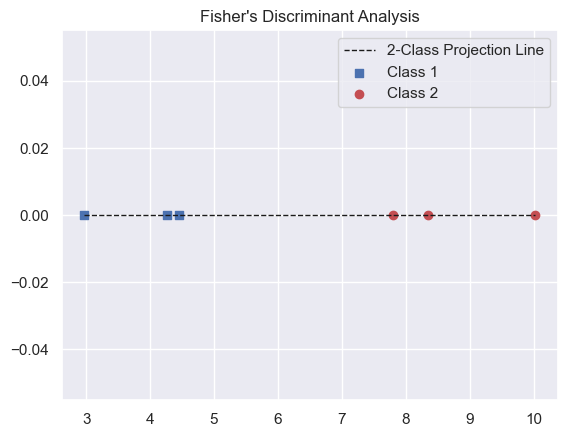

In [10]:
# Plot the data in the new 1D space
plt.scatter(data_lda[classes==0], np.zeros(len(data_lda[classes==0])), marker='s', color='b', label = 'Class 1')
plt.scatter(data_lda[classes==1], np.zeros(len(data_lda[classes==1])), marker='o', color='r', label = 'Class 2')
plt.plot([np.min(data_lda), np.max(data_lda)], [0,0], 'k--', lw=1, label = '2-Class Projection Line')
plt.title('Fisher\'s Discriminant Analysis')
plt.legend()
plt.show()

Assuming gaussian distribution we choose the threshold value $y_0$ by taking the mean of the centroids which we already calculated above as $\mu$ and project it using vector $w$. This value will be the threshold, with the margin maximized, such that if new data points are inputted we will classify them by also projecting them by using $w$ and then assessing if it is larger or smaller than our threshold.

In [11]:
# projecting mu
y_0 = np.dot(mu,w)

print ("Threshold (y_0): \n", y_0, "\n")

# Project the new data onto a 1D space using w
new_data_lda = np.array([np.dot(new_data[i],w) for i in range(len(new_data))])
print ("Projected data: \n", new_data_lda, "\n")

# Classify new data points
new_classes = np.zeros(len(new_data), dtype=object)
for i in range(len(new_data)):
    if new_data_lda[i] < y_0:
        new_classes[i] = 0
    elif new_data_lda[i] > y_0:
        new_classes[i] = 1
    else:
        new_classes[i] = "either"

print ("New classes: \n", new_classes, "\n")

Threshold (y_0): 
 6.31364149801977 

Projected data: 
 [6.12794616 7.24211819] 

New classes: 
 [0 1] 



Note that if $t = 0$ then the point belongs to class $C_1$ and if $t = 1$ then class $C_2$ for all the python outputs above.

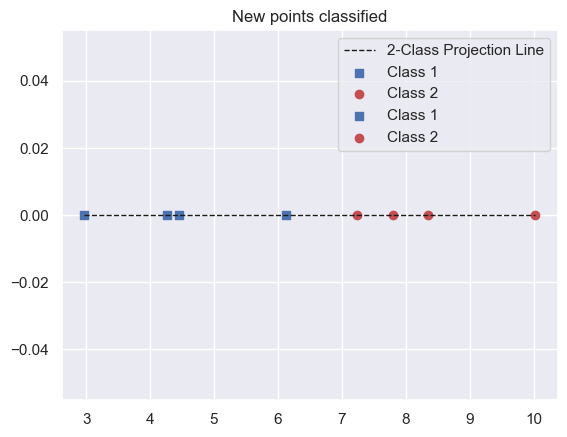

In [12]:
# Plot the data in the new 1D space
plt.scatter(data_lda[classes==0], np.zeros(len(data_lda[classes==0])), marker='s', color='b', label = 'Class 1')
plt.scatter(data_lda[classes==1], np.zeros(len(data_lda[classes==1])), marker='o', color='r', label = 'Class 2')
plt.scatter(new_data_lda[new_classes==0], np.zeros(len(new_data_lda[new_classes==0])), marker='s', color='b', label = 'Class 1')
plt.scatter(new_data_lda[new_classes==1], np.zeros(len(new_data_lda[new_classes==1])), marker='o', color='r', label = 'Class 2')
plt.plot([np.min(data_lda), np.max(data_lda)], [0,0], 'k--', lw=1, label = '2-Class Projection Line')
plt.title('New points classified')
plt.legend()
plt.show()

# Topic 3

### 1)

In [13]:
# Find output of the network for the given input
# Insert the weights for the first layer
W1 = np.array([[0.2, -0.8, 0.6],
               [0.7, -1.0, 0.3],
               [-0.5, -0.3, -0.4]])
# Insert the input features
X = np.array([1, 0.6, -0.3])
# Calculate the weighted sum for the first layer
a = W1.T @ X
print("Weighted sum (a) for the first layer: \n", a , "\n")

# Define the sigmoid activation function
def sigmoid_activation(a):
    # Apply sigmoid activation function element-wise
    return 1 / (1 + np.exp(-a))

# Apply the sigmoid activation to the weighted sum
z1 = sigmoid_activation(a)
print("Output (z1) after the first layer activation: \n", z1, "\n")

# Define the weights for the second layer
W2 = np.array([[0.7],
               [0.2],
               [-0.1],
               [-0.4]])

# Add bias term to the first layer output
z1a = np.hstack([1, z1])

# Calculate the weighted sum for the second layer
a2 = W2.T @ z1a
print("Weighted sum (a2) for the second layer: \n", a2, "\n")

# Apply the identity activation to the second layer's output
y = a2
print("Final output (y): \n", y, "\n")

Weighted sum (a) for the first layer: 
 [ 0.77 -1.31  0.9 ] 

Output (z1) after the first layer activation: 
 [0.68352089 0.21248684 0.7109495 ] 

Weighted sum (a2) for the second layer: 
 [0.53107569] 

Final output (y): 
 [0.53107569] 



### 2)
Use the formula for MSE shown in lecture 19, slide 17 (8)

![](img/Billede1.png)

In [14]:
# Assuming output
y_assume = np.array([0.531])

# Define the target value
t = np.array([-0.5])

# initialize error
error = 0

# calculate from equation above
for n in range(len(t)):
    error = 1/2 * np.sum((y_assume[n] - t[n])**2)
print("sum-of-squares Error (E): \n", error, "\n")

sum-of-squares Error (E): 
 0.5314805000000001 



### 3)

In [15]:
# Calculate the error (delta) for the output layer
delta_k = y - t
print("Error (delta_k) for the output layer: \n", delta_k, "\n")

# Calculate the gradients for the second layer
EW2 = np.array([z1a]).T @ [delta_k]
print("Gradient of the error with respect to weights in W2: \n", EW2, "\n")

# Calculate the error (delta) for the first layer
delta_j = z1 * (1 - z1) * (W2[1::] @ delta_k.T)
print("Error (delta_j) for the first layer: \n", delta_j, "\n")

# Calculate the gradients for the first layer
EW1 = np.array([X]).T @ [delta_j.T]
print("Gradient of the error with respect to weights in W1: \n", EW1, "\n")

Error (delta_k) for the output layer: 
 [1.03107569] 

Gradient of the error with respect to weights in W2: 
 [[1.03107569]
 [0.70476178]
 [0.21909002]
 [0.73304275]] 

Error (delta_j) for the first layer: 
 [ 0.04460848 -0.01725363 -0.08475455] 

Gradient of the error with respect to weights in W1: 
 [[ 0.04460848 -0.01725363 -0.08475455]
 [ 0.02676509 -0.01035218 -0.05085273]
 [-0.01338254  0.00517609  0.02542636]] 



The partial derivatives of the errors can be read in the arrays above.

### 4)

If the network has been trained on dataset ranging from $-1 \leq x_i \leq 1$, depending on the size of $N$ it will become good at predicting new data points within this range. We use interpolation when predicting values within the range. But for values outside the range, which is the case for $x_{N+1}$, we use extrapolation.

In general, the reliability of extrapolated values decreases as the difference in new test data and training data increases for neural networks.

To summarize: You can not blindly trust the network's prediction for the new point.

# Topic 4

### 1)

![](img/Billede2.png)

The two points (1 red and 1 blue) which the pink lines touch are the support vectors. The pink lines is the margin (the two pink lines have the same length).

Since we use a linear SVM we try to draw a line that separates the two classes. This line is drawn where the margin is the largest, so we find the two points, which are from each respective class, that are closest to the line and find the we make sure that the projection line of each point to the decision boundary (the pink lines) have the same distance.

### 2)
Since the test data point is on the the blue side of the decision boundary it will be assigned to $C_1$.

### 3)

#### case 1:

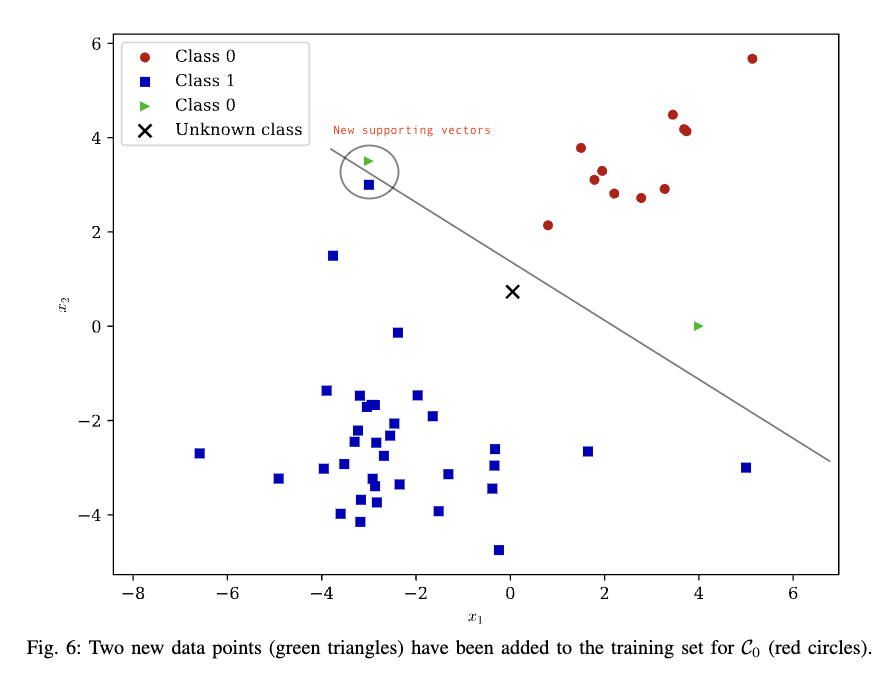

Since one of the new data points are inside the previous margin we have to change the desicion boundary. Using the same logic as in 1) we draw this new decision boundary (depicited above). The new supporting vectors have been circled together and note that the margin is also smaller than before (this has not been drawn, but should not be difficult to see).

### case 2
![](img/Billede4.png)

Here the new data points are not inside the margin, so the original decision boundary will not change.